In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [2]:
def load_data(datafile, ix):
    
    if datafile[-4:] == '.txt':
        data = pd.read_csv(datafile, sep='\t', header=0, index_col=ix)
    else:
        data = pd.read_csv(datafile, header=0, index_col=ix)
        
    return data

data = load_data('ameshousing.txt', 'Order')
data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
# This section studies each data feature independently. Characteristics of 
# the data to be examined include class counts for categorical variables, 
# descriptive statistics on continuous variables, data shape, data types, and the number
# of missing or null values.

data_shape = data.shape
print('The data shape is {}'.format(data_shape))

data_types = data.info()
print(data_types)

The data shape is (2930, 81)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 1 to 2930
Data columns (total 81 columns):
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         2930 non-nul

In [4]:
def get_num_vars(data):
    '''
        Returns the variables of a dataset that are of a numeric type.
        The variables are in a dataframe that is a subset of a copy of the input data. 
    '''
    new_data = data.copy()
    new_data = data.select_dtypes(exclude=['object', 'category'])
    
    return new_data
    
    

In [5]:
def get_catg_vars(data, *args):
    '''
        Returns an array of the name of the categorical variables in the dataframe.
        Sometimes additional variables need to specified as categorical. You can add them to
        the array by adding the variable names, as strings, as separate inputs to the function.
    '''
    
    catg_vars = data.select_dtypes(['object']).columns.values
    catg_vars = np.append(catg_vars, data.select_dtypes(['category']).columns.values)
    for arg in args:
        catg_vars = np.append(catg_vars, np.array([arg]))
    
    return catg_vars

In [6]:
# Create a list of the categorical variables in the data
# Note that features involving year is not considered categorical for this analysis,
# since the difference between the years of two records may affect the target variable
catg_vars = get_catg_vars(data, 'PID', 'MS SubClass', 'Overall Qual', 'Overall Cond')
print(catg_vars)
print('\nThere are {} categorical variables'.format(len(catg_vars)))

['MS Zoning' 'Street' 'Alley' 'Lot Shape' 'Land Contour' 'Utilities'
 'Lot Config' 'Land Slope' 'Neighborhood' 'Condition 1' 'Condition 2'
 'Bldg Type' 'House Style' 'Roof Style' 'Roof Matl' 'Exterior 1st'
 'Exterior 2nd' 'Mas Vnr Type' 'Exter Qual' 'Exter Cond' 'Foundation'
 'Bsmt Qual' 'Bsmt Cond' 'Bsmt Exposure' 'BsmtFin Type 1' 'BsmtFin Type 2'
 'Heating' 'Heating QC' 'Central Air' 'Electrical' 'Kitchen Qual'
 'Functional' 'Fireplace Qu' 'Garage Type' 'Garage Finish' 'Garage Qual'
 'Garage Cond' 'Paved Drive' 'Pool QC' 'Fence' 'Misc Feature' 'Sale Type'
 'Sale Condition' 'PID' 'MS SubClass' 'Overall Qual' 'Overall Cond']

There are 47 categorical variables


In [7]:
def conv_to_catg_type(data, catg_vars):
    '''
        Convert the categorical values to data type category.
    '''
    data[catg_vars] = data[catg_vars].apply(lambda x: x.astype('category'))
    
    return data

data = conv_to_catg_type(data, catg_vars)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 1 to 2930
Data columns (total 81 columns):
PID                2930 non-null category
MS SubClass        2930 non-null category
MS Zoning          2930 non-null category
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null category
Alley              198 non-null category
Lot Shape          2930 non-null category
Land Contour       2930 non-null category
Utilities          2930 non-null category
Lot Config         2930 non-null category
Land Slope         2930 non-null category
Neighborhood       2930 non-null category
Condition 1        2930 non-null category
Condition 2        2930 non-null category
Bldg Type          2930 non-null category
House Style        2930 non-null category
Overall Qual       2930 non-null category
Overall Cond       2930 non-null category
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         293

In [8]:
## Next, let's deal with the null values in the dataset
def get_null_vars(data):
    '''
        Returns the column names in a dataframe of the columns with null values.
        The output is separated by categorical and quantitative variables.
    '''
    catg_null_vars = []
    quant_null_vars = []
    vars_w_na_data = data.columns[data.isnull().any()].tolist()
    for var in vars_w_na_data:
        if ((data[var].dtype.name == 'category') or (data[var].dtype.name == 'object')):
            catg_null_vars += [var]
        else:
            quant_null_vars += [var]
    
    return catg_null_vars, quant_null_vars

In [9]:
catg_null_vars, quant_null_vars = get_null_vars(data)
print(catg_null_vars)
print(quant_null_vars)

['Alley', 'Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Electrical', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']
['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt', 'Garage Cars', 'Garage Area']


In [10]:
def get_null_ix(data, col_names):
    '''
        Given a list of column names, return the indices of the rows where the null values
        of those columns are located.
    '''
    
    ix_dict = {col: data[data[col].isnull()].index for col in col_names}
    
    return ix_dict
    

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('precision', 2)

In [12]:
# Investigate the numeric variables
data_num = get_num_vars(data)

In [13]:
# Start with univariate analysis
print(data_num.columns.values)
print('\n')
print(data_num.describe())

['Lot Frontage' 'Lot Area' 'Year Built' 'Year Remod/Add' 'Mas Vnr Area'
 'BsmtFin SF 1' 'BsmtFin SF 2' 'Bsmt Unf SF' 'Total Bsmt SF' '1st Flr SF'
 '2nd Flr SF' 'Low Qual Fin SF' 'Gr Liv Area' 'Bsmt Full Bath'
 'Bsmt Half Bath' 'Full Bath' 'Half Bath' 'Bedroom AbvGr' 'Kitchen AbvGr'
 'TotRms AbvGrd' 'Fireplaces' 'Garage Yr Blt' 'Garage Cars' 'Garage Area'
 'Wood Deck SF' 'Open Porch SF' 'Enclosed Porch' '3Ssn Porch'
 'Screen Porch' 'Pool Area' 'Misc Val' 'Mo Sold' 'Yr Sold' 'SalePrice']


       Lot Frontage   Lot Area  Year Built  Year Remod/Add  Mas Vnr Area  \
count       2440.00    2930.00     2930.00         2930.00       2907.00   
mean          69.22   10147.92     1971.36         1984.27        101.90   
std           23.37    7880.02       30.25           20.86        179.11   
min           21.00    1300.00     1872.00         1950.00          0.00   
25%           58.00    7440.25     1954.00         1965.00          0.00   
50%           68.00    9436.50     1973.00         

In [14]:
# Check the data skews
skews = data_num.skew()
print(skews)

Lot Frontage        1.50
Lot Area           12.82
Year Built         -0.60
Year Remod/Add     -0.45
Mas Vnr Area        2.61
BsmtFin SF 1        1.42
BsmtFin SF 2        4.14
Bsmt Unf SF         0.92
Total Bsmt SF       1.16
1st Flr SF          1.47
2nd Flr SF          0.87
Low Qual Fin SF    12.12
Gr Liv Area         1.27
Bsmt Full Bath      0.62
Bsmt Half Bath      3.94
Full Bath           0.17
Half Bath           0.70
Bedroom AbvGr       0.31
Kitchen AbvGr       4.31
TotRms AbvGrd       0.75
Fireplaces          0.74
Garage Yr Blt      -0.38
Garage Cars        -0.22
Garage Area         0.24
Wood Deck SF        1.84
Open Porch SF       2.54
Enclosed Porch      4.01
3Ssn Porch         11.40
Screen Porch        3.96
Pool Area          16.94
Misc Val           22.00
Mo Sold             0.19
Yr Sold             0.13
SalePrice           1.74
dtype: float64


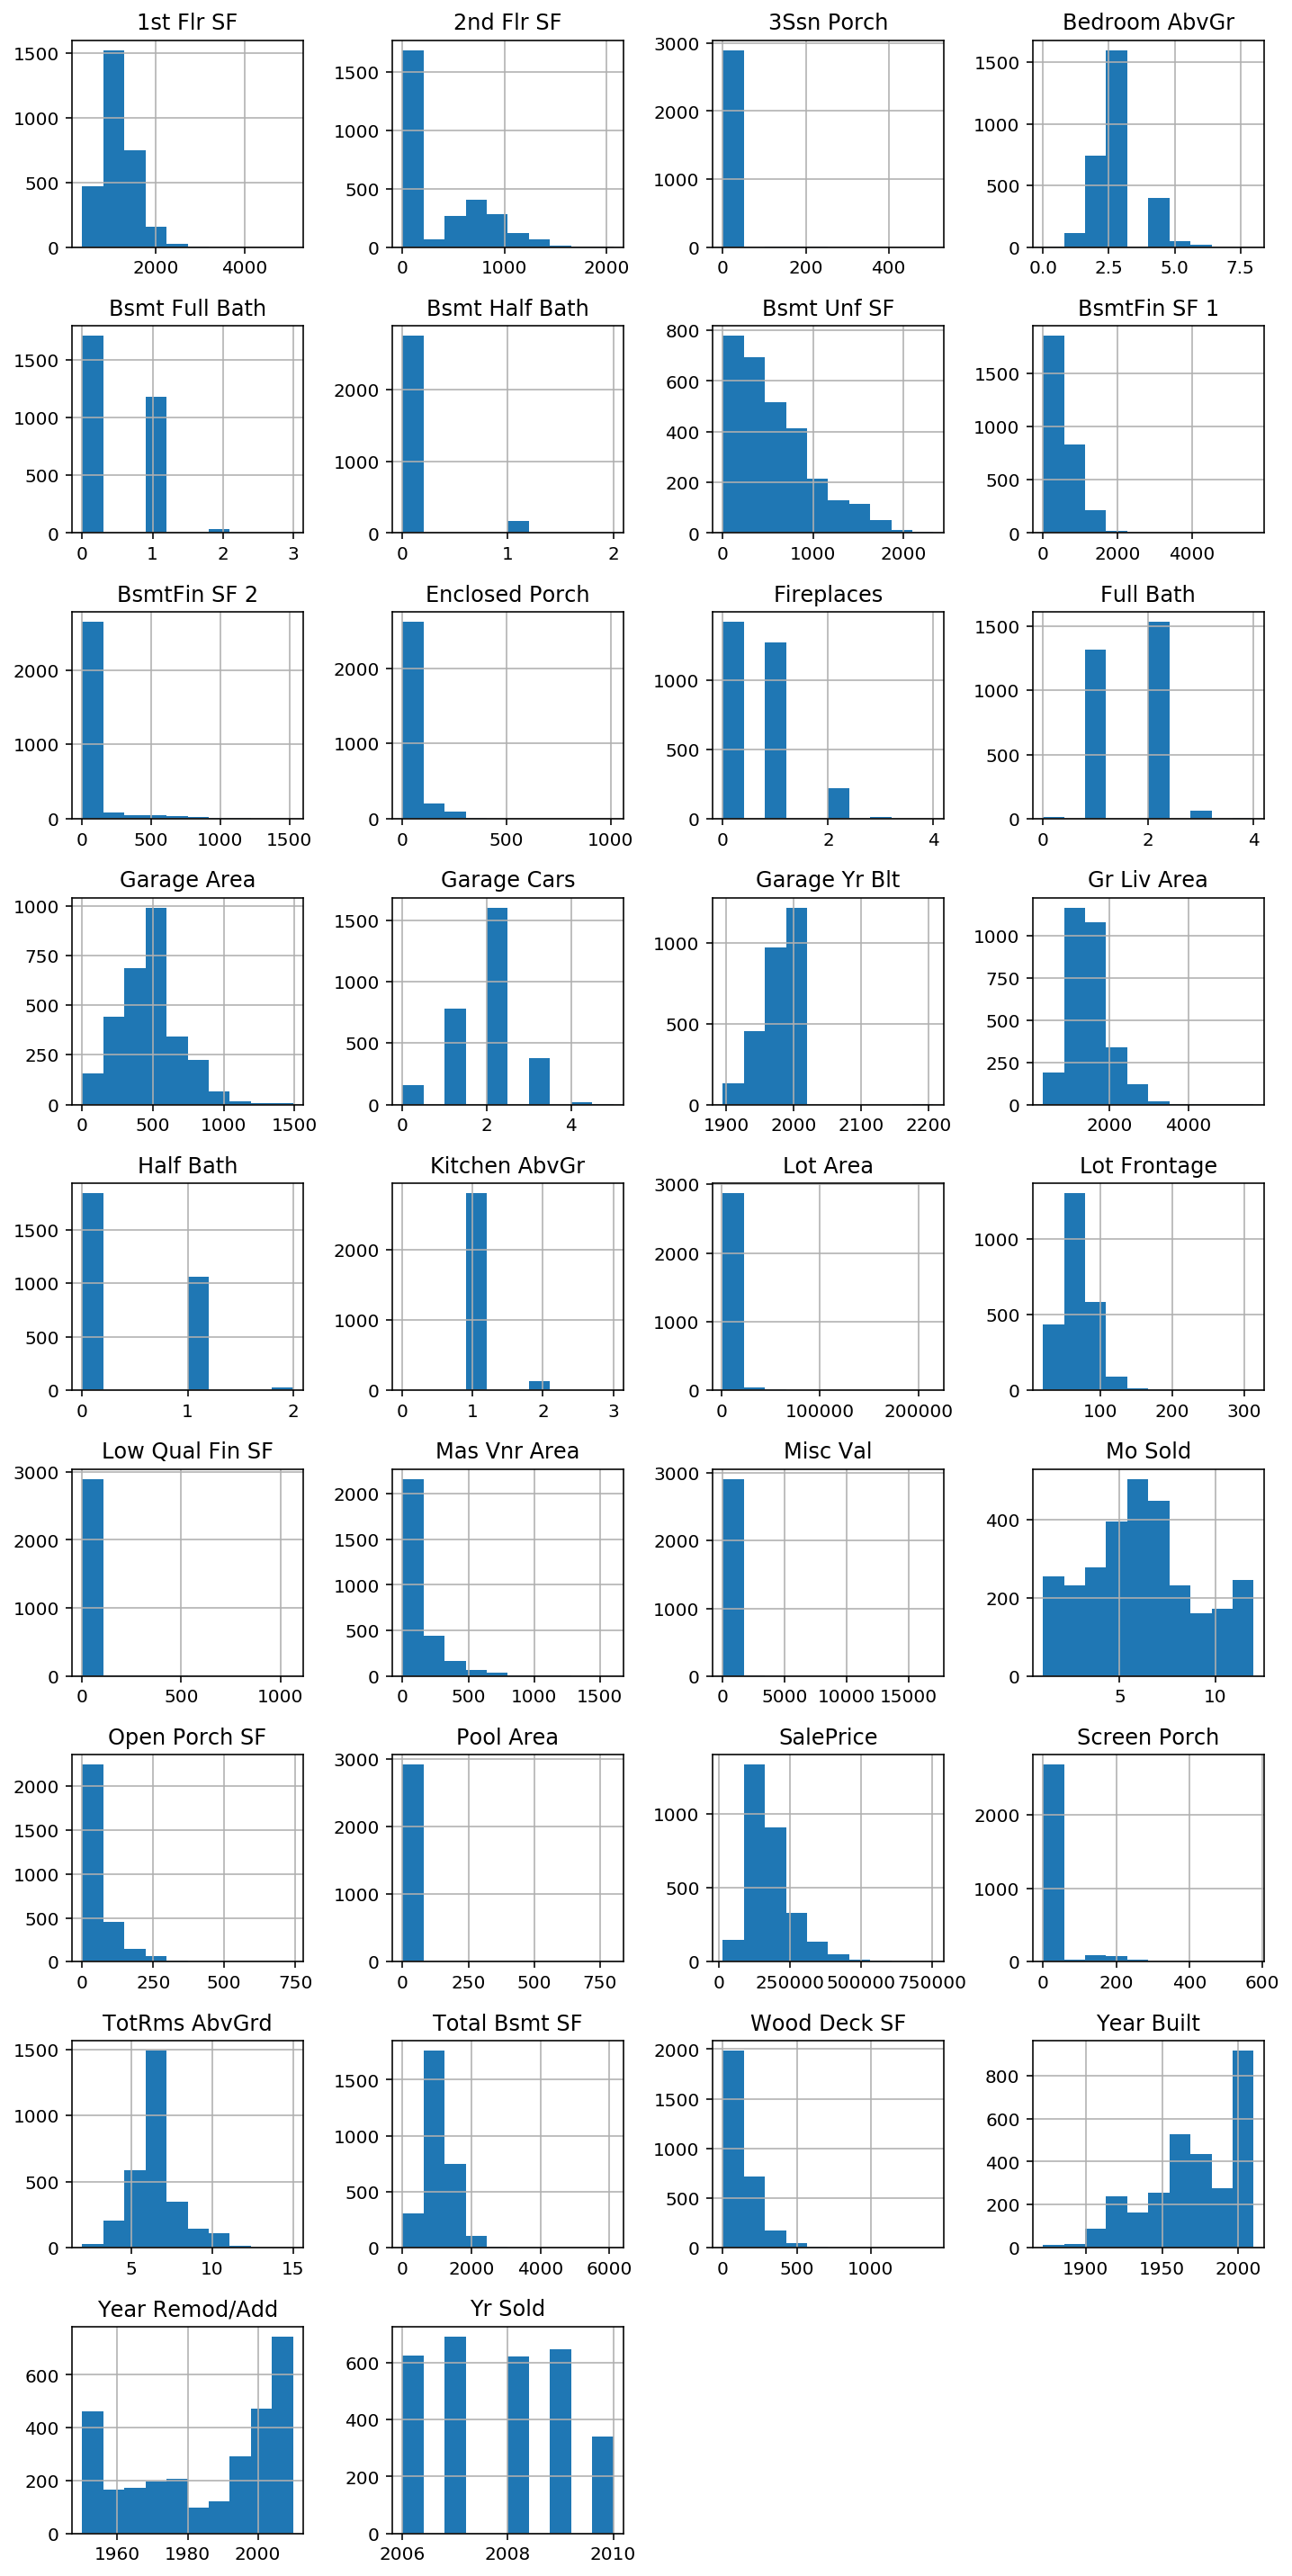

In [17]:
# Plot histograms of the numeric variables
data_num.hist(figsize=(10, 20), layout=(-1, 4))
plt.tight_layout()
plt.show()


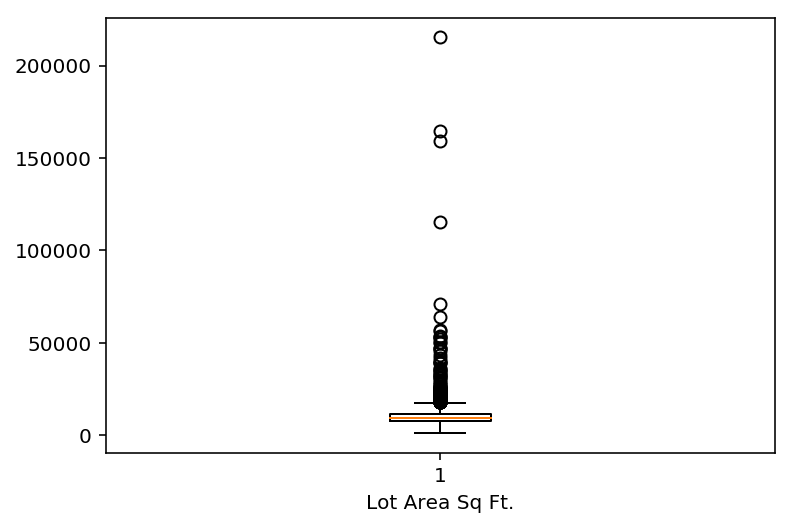

In [24]:
# The skew calculations and the histograms show 
# that some variable have high skew
# Examine a boxplot for Lot Area, which is right-skewed
fig, ax = plt.subplots()
ax.boxplot(data_num['Lot Area'])
ax.set_xlabel('Lot Area Sq Ft.')
plt.show()

In [35]:
# The histograms review that some features such as Bsmt Unf SF follow an exponential distribution
# Apply a box-cox transform to such features so that their distribution can be more Gaussian
from scipy.stats import boxcox
open_porch_boxcox, lda = boxcox(data_num['Open Porch SF'].values + 1)

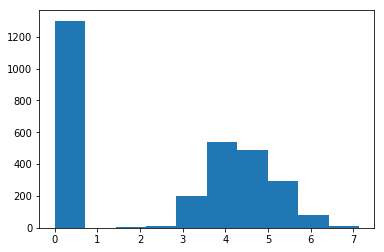

In [36]:
plt.hist(open_porch_boxcox)
plt.show()

In [37]:
bsmt_unf_log = np.log(data_num['Bsmt Unf SF'] + 1)

In [48]:
bsmt_unf = data_num['Bsmt Unf SF'].dropna()

In [49]:
bsmt_unf_boxcox, lda = boxcox(bsmt_unf + 1)

In [51]:
print(bsmt_unf_boxcox)
print(lda)

[34.66665444 27.15031129 33.2757985  ... 39.51084792 23.0378666
 25.48118654]
0.4669133583889261


<function matplotlib.pyplot.show>

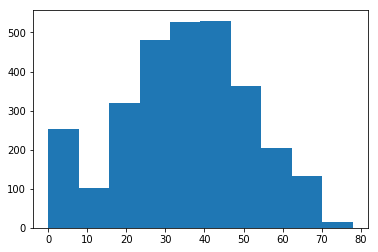

In [50]:
plt.hist(bsmt_unf_boxcox)
plt.show

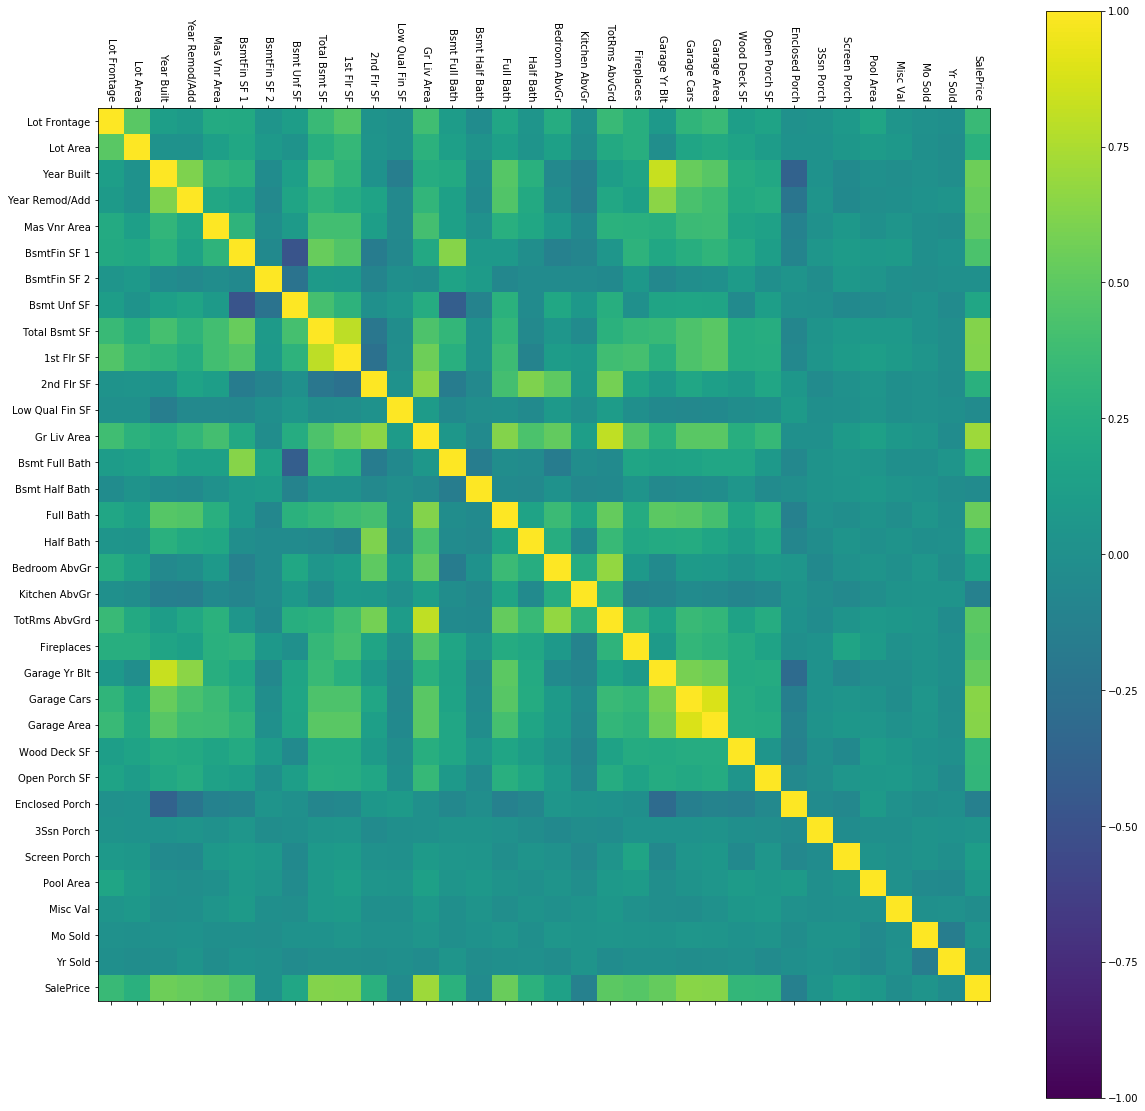

In [46]:
# Check the correlations between the numeric variables
# corr = data_num.corr()
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
names = data_num.columns.values
ticks = np.arange(0, len(names), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
_ = ax.set_xticklabels(names)
_ = ax.set_yticklabels(names)
_ = plt.xticks(rotation=-90)

In [10]:
null_ix = get_null_ix(data, catg_null_vars)

In [31]:
pd.set_option('display.max_columns', None)

In [33]:
data.loc[null_ix['Electrical']]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1578,916386080,80,RL,73.0,9735,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,NaN,754,640,0,1394,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [16]:
def fill_nulls(data, **kwargs):
    '''
        Given a set of keyword arguments, fill in the null values of a dataframe column, where the
        key is the column name and the value is the fill value.
    '''
    
    for col, value in kwargs.items():
        try:
            data[col].cat.add_categories([value], inplace=True)
        except:
            pass
        data[col].fillna(value=value, inplace=True)
        

In [17]:
fill_dict = {'Alley': 'No Alley Access', 'Mas Vnr Type': 'None', 'Bsmt Qual': 'No Basement', 
             'Bsmt Cond': 'No Basement', 'BsmtFin Type 1': 'No Basement', 'BsmtFinType 2': 'No Basement', 
             'Eletrical': ''}
fill_nulls(data, **fill_dict)

In [ ]:
# From the codebook, a Null value for alley means no alley access so we can fill that in as a separate class
try:
    data['Alley'].cat.add_categories(['No Alley Access'], inplace=True)
except:
    pass
data['Alley'].fillna(value='No Alley Access', inplace=True)

In [ ]:
# From the codebook, a Null value for Mas Vnr Type should be None
data['Mas Vnr Type'].fillna(value='None', inplace=True)

In [ ]:
# From the codebook, a Null value for Bsmt Qual indicates No Basement
try:
    data['Bsmt Qual'].cat.add_categories(['No Basement'], inplace=True)
except:
    pass
data['Bsmt Qual'].fillna(value='No Basement', inplace=True)


In [ ]:
# Make the basement qual variable an ordinal variable
catg_order = ['No Basement', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
data['Bsmt Qual'] = pd.Categorical(data['Bsmt Qual'], ordered=True, categories=catg_order)

In [ ]:
# From the codebook, a Null value for Bsmt Cond indicates No Basement
try:
    data['Bsmt Cond'].cat.add_categories(['No Basement'], inplace=True)
except:
    pass
data['Bsmt Cond'].fillna(value='No Basement', inplace=True)

# Make the basement cond variable an ordinal variable
catg_order = ['No Basement', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
data['Bsmt Cond'] = pd.Categorical(data['Bsmt Cond'], ordered=True, categories=catg_order)

## Note: There are equal number of null values for Bsmt Qual as for Bsmt Cond, which makes sense

In [ ]:
# Define a helper function to show the distribution of records across all labels for a
# given set of categorical variables
def show_label_distr(df, catg_vars):
    for var in catg_vars:
        # Replace null values with a label
        if any(pd.isnull(data[var])):
            df[var].fillna('None', inplace=True)
        print(df.groupby(var).size().sort_values(ascending=False), '\n')

In [ ]:
show_label_distr(data, vars_w_na_data)

In [ ]:
# Get the class counts for categorical variables
ms_subclass = data.groupby('MS SubClass').size().sort_values(ascending=False)
print(ms_subclass)

In [ ]:
ms_zoning = data.groupby('MS Zoning').size().sort_values(ascending=False)
print(ms_zoning)

In [ ]:
street = data.groupby('Street').size().sort_values(ascending=False)
print(street)

In [ ]:
alley = data.groupby('Alley').size()
print(alley)
print('There are {} null values in Alley'.format(len(data) - alley.sum()))

In [ ]:
# Fill in alley null values with another meaningful label
data['Alley'].fillna('No Alley Access'.astype('category'), inplace=True)
alley = data.groupby('Alley').size()
print(alley)

In [ ]:
data.columns